Гурский А.
Семинары по теме: 02-03, 05-06

# Домашнее задание №3

Это задание состоит из двух сюжетов:

1) Обучение и эксперименты с моделями (код в основном который был на семинарах, но теперь надо написать его самим).

2) Самостоятельная реализация различных способов кодирования категориальных признаков - полезное упражнение для понимания кодировок.

## <font color='green'>Часть 1. ML practice (**всего 5 баллов**)</font>

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from itertools import product

### Загрузим данные для работы.

#### Набор данных 'Диабет'
-------------------

Десять базовых переменных: возраст, пол, индекс массы тела, среднее артериальное давление и шесть показателей сыворотки крови были получены для n = 442 пациентов с диабетом. Также указана целевая переменная — количественная мера прогрессирования заболевания через год после базового обследования.

**Характеристики набора данных:**

:Количество наблюдений: 442

:Количество признаков: Первые 10 столбцов — числовые предикторы

:Целевая переменная: Столбец 11 содержит количественную меру прогрессирования заболевания через год

:Описание признаков:

    - age     возраст (в годах)  
    - sex     пол
    - bmi     индекс массы тела
    - bp      среднее артериальное давление
    - s1      tc, общий холестерин сыворотки
    - s2      ldl, липопротеины низкой плотности
    - s3      hdl, липопротеины высокой плотности
    - s4      tch, общий холестерин / HDL
    - s5      ltg, логарифм уровня триглицеридов в сыворотке
    - s6      glu, уровень глюкозы в крови

Примечание: Все 10 признаков были центрированы (среднее = 0) и масштабированы с помощью стандартного отклонения, умноженного на квадратный корень из `n_samples` (сумма квадратов каждого столбца равна 1).

Источник:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

Дополнительная информация:
Bradley Efron, Trevor Hastie, Iain Johnstone и Robert Tibshirani (2004) 'Least Angle Regression,' Annals of Statistics (с обсуждением), 407-499.
(https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

In [12]:
from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame=True)
print(data.DESCR)
df = data.frame
df.head()

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Будем решать задачу регрессии: необходимо предсказать уровень сахара в крови по характеристикам пациентов

### Шаг 1.  (**0.2 балла**)
Создайте матрицу X объект-признак и целевой вектор y ('target')

In [14]:
#your code here
data = df.copy()
data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
# Создадим матрицу X и целевой признак y - target
X = data.drop(columns=['target']) 
y = data['target']
print(X.dtypes)


age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object


In [16]:
# Выведем таблицу корреляций
correlation_with_price = data.corr(method='pearson',
                               min_periods=1,
                               numeric_only=True)['target'].abs().sort_values(ascending=False)
print(correlation_with_price.head(10))

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s3        0.394789
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
Name: target, dtype: float64


### Шаг 2. (**0.2 балла**)
Разбейте данные на train и test (доля тестовых данных - 30%).

In [18]:
# Разобъем выборку 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    )
print(f'Размер обучающей выборки: {len(X_train)}')
print(f'Размер тестовой выборки: {len(X_test)}')

Размер обучающей выборки: 309
Размер тестовой выборки: 133


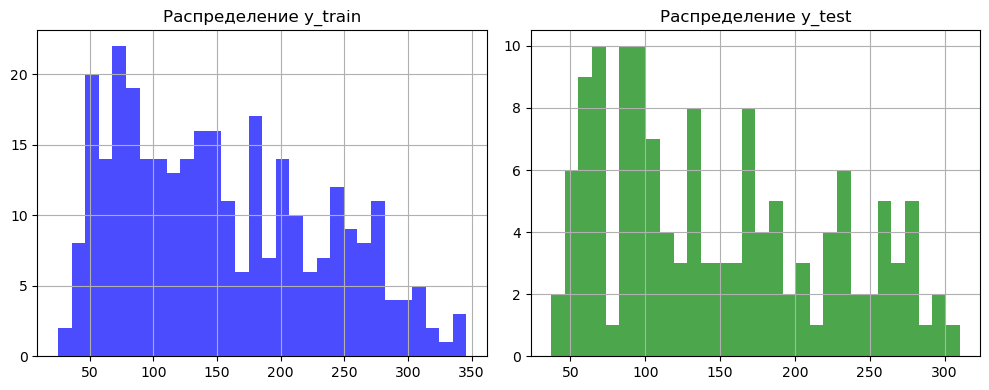

In [19]:
# проверим распределение переменной target
plt.figure(figsize=(10, 4))

#  График для y_train 
plt.subplot(1, 2, 1)  # 1 строка, 2 колонки, 1-й график
plt.hist(y_train, bins=30, color='blue', alpha=0.7)  # гистограмма для y_train
plt.title('Распределение y_train')  # заголовок
plt.grid(True)  # включаем сетку

#  График для y_test 
plt.subplot(1, 2, 2)  # 1 строка, 2 колонки, 2-й график
plt.hist(y_test, bins=30, color='green', alpha=0.7)  # гистограмма для y_test
plt.title('Распределение y_test')  # заголовок
plt.grid(True)  # включаем сетку

#  Подгоняем отступы между графиками 2
plt.tight_layout()

plt.show()


### Шаг 3. (**0.2 балла**)
Обучите линейную регрессию на тренировочных данных и сделайте предсказания на train и на test.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# переменная модели
model = LinearRegression()
# Обучение модели на масштабированных данных
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Оценка качества
r2_train = model.score(X_train, y_train)
r2_test =r2_score(y_test, y_pred)
print(f'R2 train: {r2_train:.2f}')
print(f'R2 test : {r2_test:.2f}')

R2 train: 0.52
R2 test : 0.48


### Шаг 4. (**0.4 балла**)
Выведите на экран ошибку MSE на train и на test, затем выведите на экран ошибку r2 на train и test.  

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Предсказания на трейне
y_train_pred = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_pred)

print(f'MAE train: {mae_train:.2f}')
print(f'MAE test : {mae_test:.2f}')
print(f'MSE train: {mse_train:.2f}') 
print(f'MSE test : {mse_test:.2f}')
print(f'R2 train: {r2_train:.2f}')
print(f'R2 на тесте : {r2_test:.2f}') 

MAE train: 44.10
MAE test : 41.92
MSE train: 2924.05
MSE test : 2821.75
R2 train: 0.52
R2 на тесте : 0.48


### Шаг 5. (**0.5 балла**)
Вычислите среднее качество (r2) модели на кросс-валидации с k=5 фолдами.

In [25]:
# Кросс-валидация
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, 
                         X_train, 
                         y_train, 
                         cv=5, 
                         scoring='r2')
print(f'Средний R2 по кросс-валидации: {np.mean(scores):.3f} ± {np.std(scores):.3f}')


Средний R2 по кросс-валидации: 0.452 ± 0.127


#### Вывод:

Модель не показывает признаков переобучения, так как результаты на тренировочных и тестовых данных не имеют значительных расхождений. Однако показания R2 ниже 0.5 для обеих метрик указывают на необходимость улучшения модели.


### Шаг 6.  (**0.5 балла**)
Теперь примените линейную регрессию с L1-регуляризацией (Lasso) для данной задачи. Объявите модель и подберите параметр регуляризации alpha по сетке. Ищите alpha в диапазоне (0.1, 1.1) с шагом 0.1.

Осуществите подбор параметра alpha по тренировочным данным (Xtrain, ytrain).

In [29]:
from sklearn.linear_model import Lasso

# Объявляем модель
lasso = Lasso(alpha=1.0)

lasso.fit(X_train, y_train)
print(lasso.score(X_test, y_test) * 100)


36.18980286195787


In [30]:
# Подберем альфа циклом

# Создадим список с шагом 0.1
alphas = [round(a, 2) for a in list(np.arange(0.01, 1.0, 0.1))]

# перебираем значения альфа
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    score = lasso.score(X_test, y_test)
    print(f'alpha = {alpha:.1f} - R2 = {score:.2f}')


alpha = 0.0 - R2 = 0.48
alpha = 0.1 - R2 = 0.49
alpha = 0.2 - R2 = 0.48
alpha = 0.3 - R2 = 0.47
alpha = 0.4 - R2 = 0.46
alpha = 0.5 - R2 = 0.45
alpha = 0.6 - R2 = 0.44
alpha = 0.7 - R2 = 0.43
alpha = 0.8 - R2 = 0.41
alpha = 0.9 - R2 = 0.38


Мы можем выполнить перекрёстную проверку, чтобы найти оптимальное значение параметра alpha модели Lasso. Для этого используются такие методы, как перекрёстная проверка K-Fold

In [32]:
# Подберем фльфа с помощью модели LassoCV
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5, random_state=42, max_iter=1000)
lassocv.fit(X_train, y_train)
al = lassocv.alpha_
print(al)

lasso = Lasso(alpha=al)
lasso.fit(X_train, y_train)
print(lasso.score(X_test, y_test))

0.005255949654897526
0.47824189288263375


### Шаг 7.  (**0.5 балла**)
Выведите наилучший алгоритм и наилучшее качество по результатам подбора alpha (best_estimator_ и best_score_).

In [34]:
# Ищем лучший набор параметров

from sklearn.model_selection import GridSearchCV

num_splits = 5
params = {'alpha':alphas}
# print(params)

# Создаем объект
cv = GridSearchCV(lasso,
                  params,
                  scoring='r2',
                  cv=num_splits
                 )

# обучаем
cv.fit(X_train, y_train)

print(f' {cv.best_estimator_}')
print(f' R2: {cv.best_score_:.3f}')

 Lasso(alpha=0.01)
 R2: 0.453


### Шаг 8.  (**0.5 балла**)

С помощью найденного best_estimator_ сделайте предсказание на тестовых данных и выведите на экран r2-score test.

In [36]:
# Предсказания test
predict = cv.best_estimator_.predict(X_test)
r2 = r2_score(y_test, predict)

print(f' {cv.best_estimator_}')
print(f' R2 test: {r2:.3f}')

 Lasso(alpha=0.01)
 R2 test: 0.479


#### Вывод:

Значение регуляции 0.01 - модель оставляет большинство признаков.
R2 на уровне примерно 0.48 указывает на то, что модель показывает сходные результаты как с Lasso, так и с обычной линейной регрессией. Это указывает на то, что введение регуляризации положительно повлияло на предсказания, хоть и R2 остался достаточно низким.  

### Шаг 9.  (**0.5 балла**)

Попробуем улучшить качество модели за счет добавления полиномиальных признаков. Создайте pipeline, состоящий из добавления полиномиальных признаков степени 2, а затем применения линейной регрессии. Может стоит добавить ещё и скейлер?

Затем вычислите r2-score этой модели на кросс валидации с пятью фолдами.

In [39]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [40]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Создаем и обучаем scaler на числовых признаках трейна
scaler = StandardScaler()
scaler.fit(X_train)

# Масштабируем признаки и создаем dataframe pandas
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# 4. Выводим результат
print('Тренировочные данные после масштабирования:')
print(X_train_scaled.head)
print('\nТестовые данные после масштабирования:')
print(X_test_scaled.head)

#your code here

Тренировочные данные после масштабирования:
<bound method NDFrame.head of           age       sex       bmi        bp        s1        s2        s3  \
0    0.642054  1.056616  0.619060  1.004864 -0.868439 -0.932813 -1.448515   
1    1.584921 -0.946417  1.719844  1.292210  0.279081  0.251378  0.339207   
2   -1.243678  1.056616 -0.279540  0.502008  0.451209  0.814031 -0.826699   
3    0.484910 -0.946417  2.236539  1.292210  0.250393 -0.710368 -0.515791   
4    0.013477  1.056616 -0.189680 -0.431868 -0.237303  0.081273 -0.826699   
..        ...       ...       ...       ...       ...       ...       ...   
304 -2.107973 -0.946417 -1.649905 -0.934724 -0.983191 -0.749623  0.183753   
305  0.092049  1.056616  0.574130  1.723230 -0.811063 -1.011322  0.339207   
306  0.642054 -0.946417 -0.481725 -0.144522 -0.122551 -0.638401  1.660567   
307 -0.300812 -0.946417 -0.549120 -0.862888 -0.380743  0.074730 -0.360337   
308 -2.029400 -0.946417  0.529200 -0.360032  0.738089  0.499992  1.194204   

 

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Создаем пайплайн с полиномиальными признаками, скейлером и линейной регрессией
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),    # Добавление полиномиальных признаков степени 2
    # ('scaler', StandardScaler()),              # Стандартизация признаков
    ('lin_reg', LinearRegression())            # Линейная регрессия
                   ])

# Выполняем кросс-валидацию с пятью фолдами и вычисляем R2-score
r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

# Вычисляем средний R2-score и стандартное отклонение
mean_r2 = r2_scores.mean()
std_r2 = r2_scores.std()


# Выводим результаты
print(f'Средний R2-score на кросс-валидации: {mean_r2:.3f} ± {std_r2:.3f}')


Средний R2-score на кросс-валидации: 0.216 ± 0.287


In [42]:
# выполняем кросс-валидацию для MSE
mse_scores = cross_val_score(pipeline, 
                             X_train, 
                             y_train, 
                             cv=5, 
                             scoring='neg_mean_squared_error')  # MSE в виде отрицательного

mean_mse = -mse_scores.mean()  # Преобразуем в положительное значение
std_mse = mse_scores.std()  # Здесь MSE сохраняется в отрицательном виде

In [43]:
pipeline.fit(X_train, y_train)

print(f'R2 train: {pipeline.score(X_train, y_train):.4f}')
print(f'R2 на кросс-валидации: {mean_r2:.4f}')
print(f'Средний R2:  {mean_r2:.4f} ± {std_r2:.4f}')
print(f'Средний MSE: {mean_mse:.2f} ± {std_mse:.2f}')

R2 train: 0.6081
R2 на кросс-валидации: 0.2156
Средний R2:  0.2156 ± 0.2867
Средний MSE: 4480.70 ± 1001.32


### Шаг 10.  (**0.5 балла**)
Обучите модель (pipeline) на тренировочных данных и сделайте предсказания для train и test, затем выведите на экран r2-score и MSE на тренировочных и на тестовых данных.

In [45]:
from sklearn.metrics import r2_score, mean_squared_error

# 1. Обучаем pipeline на тренировочных данных
pipeline.fit(X_train, y_train)

# 2. Предсказания на train и test
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# 3. R2 на тренировочных и тестовых данных
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# 4. MSE на тренировочных и тестовых данных
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# 5. Выводим метрики
print(f'R2 train:  {r2_train:.4f}')
print(f'R2 test:   {r2_test:.4f}')
print(f'MSE train: {mse_train:.2f}')
print(f'MSE test:  {mse_test:.2f}')


R2 train:  0.6081
R2 test:   0.4130
MSE train: 2409.43
MSE test:  3168.93


#### Вывод:

Добавление полиномиальных признаков второй степени не улучшило качество модели, что видно из полученного R2 на уровне 0.2156 при кросс-валидации и значении MSE, которые указывают на низкую производительность. Полиномиальные признаки увеличили размерность данных и повысили риск переобучения. В данном случае, увеличение объема признаков привело к снижению обобщающей способности модели.


StandardScaler не повлиял на показатели модели, так как данные были нормированы изначально, что делает стандартизацию избыточной.

### Сделайте выводы. Для этого ответьте на вопросы: (**0.5 балла**)

1) Хорошее ли качество показала исходная модель (линейная регрессия без регуляризации)? Является ли эта модель переобученной?



2) Помогла ли L1-регуляризация улучшить качество модели?

3) Помогло ли добавление полиномов второй степени улучшить качество модели? Как добавление новых признаков повлияло на переобучение?



### Выводы


1) Качество исходной модели (линейная регрессия без регуляризации):
   - Исходная модель не демонстрирует признаков переобучения, так как результаты на тренировочных и тестовых данных не имеют значительных расхождений. Однако значения R ниже 0.5 для обеих метрик указывают на необходимость улучшения модели, что сигнализирует, что модель недостаточно эффективно объясняет дисперсию целевой переменной.


2) Влияние L1-регуляризации на качество модели:
   - Применение L1-регуляризации (Lasso) с параметром alpha = 0.01 показало положительный эффект. Модель оставляет большинство признаков, и R2 на уровне примерно 0.48 указывает на схожие результаты как с Lasso, так и с обычной линейной регрессией. Однако, несмотря на это улучшение, значение R2 остается достаточно низким, что говорит о том, что необходимо дальнейшее усовершенствование модели.


3) Добавление полиномиальных признаков:
   - Введение полиномиальных признаков второй степени не привело к улучшению качества модели, как это можно увидеть из полученного R2 на уровне 0.2156 при кросс-валидации и значений MSE, указывающих на низкую производительность. Увеличение размерности данных вместе с увеличен.
    Пприменение StandardScaler не оказало влияния на показатели модели, так как данные были нормированы изначально, что делает стандартизацию избыточной.


### Попытайтесь улучшить модель (добейтесь наилучшего качества) - можно использовать любые методы  (**0.5 балла**)

Попробуйте L2 регуляризацию. Стало ли лучше с ней?

In [51]:
# Ищем лучший набор параметров
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

num_splits = 5
params = {'alpha':alphas}
# print(params)

# Создаем объект
cv = GridSearchCV(Ridge(),
                  params,
                  scoring='r2',
                  cv=num_splits
                 )

# обучаем
cv.fit(X_train, y_train)

print(f' {cv.best_estimator_}')
print(f' R2: {cv.best_score_:.3f}')

 Ridge(alpha=0.01)
 R2: 0.453


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# Создаем пайплайн с полиномиальными признаками, скейлером и L2-регрессией
pipeline_ridge = Pipeline([
    # ('poly', PolynomialFeatures(degree=2)),    # добавление полиномиальных признаков степени 2
    ('scaler', StandardScaler()),                # стандартизация признаков
    ('ridge_reg', Ridge(alpha=cv.best_score_))             # L2-регрессия
                          ])

# Выполняем кросс-валидацию с 5 фолдами и вычисляем R2-score
r2_scores_ridge = cross_val_score(pipeline_ridge, X_train, y_train, cv=5, scoring='r2')

# Вычисляем средний R2-score и стандартное отклонение
mean_r2_ridge = r2_scores_ridge.mean()
std_r2_ridge = r2_scores_ridge.std()

# Обучаем модель на тренировочных данных
pipeline_ridge.fit(X_train, y_train)

# Предсказания на тестовых данных
y_test_pred_ridge = pipeline_ridge.predict(X_test)

# Вычисляем R2 и MSE для тестовых данных
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)

# Выводим результаты
print(f'Средний R2-score на кросс-валидации (Ridge): {mean_r2_ridge:.3f} ± {std_r2_ridge:.3f}')
print(f'R2 test (Ridge): {r2_test_ridge:.4f}')
print(f'MSE test (Ridge): {mse_test_ridge:.2f}')


Средний R2-score на кросс-валидации (Ridge): 0.453 ± 0.126
R2 test (Ridge): 0.4775
MSE test (Ridge): 2820.57


### Вывод:
Введение L2-регуляризации показало положительный эффект на качество модели. Значения R2 и MSE на тестовых данных улучшились по сравнению с предыдущими оценками, что указывает на лучшую способность модели объяснять целевую переменную.

Показатели на тренировочных и тестовых данных не показывают значительных расхождений, что также говорит о том, что модель не склонна к переобучению.

---


## <font color='green'>Часть 2. Target encoding (**всего 5 баллов**)</font>

В этом части домашнего задания вы будете работать с выборкой `1C`. Вам нужно посчитать счетчики для `item_id` четырьмя способами:

    1) При помощи KFold схемы;  
    2) При помощи Leave-one-out схемы;
    3) При помощи smoothing схемы;
    4) При помощи expanding mean схемы.

# Цель задания

Вам нужно для каждой строки в датасете вычислить **среднее значение целевой переменной (`target`) по `item_id`**, но сделать это **четырьмя различными способами**, которые помогают предотвратить утечку данных и переобучение модели.

## Исходные данные
- `item_id` — категориальный признак;
- `target` — целевая переменная (например, `0/1` в задаче классификации).

---

## 📌 1. KFold-схема (KFold Target Encoding)

**Идея**: разбить данные на $K$ фолдов. Для каждой строки использовать статистику `target` по `item_id`, вычисленную **на остальных фолдах** (не включая текущий).

**Почему это работает**: вы не используете саму строку при вычислении её значения — это снижает переобучение и имитирует работу модели test.

**Пример**:
```python
kf = KFold(n_splits=5)
for train_idx, val_idx in kf.split(X):
    mean_target_by_item = y[train_idx].groupby(item_id[train_idx]).mean()
    encoded[val_idx] = item_id[val_idx].map(mean_target_by_item)


### Подготовка данных

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from itertools import product

In [60]:
sales = pd.read_csv('sales_train.csv.gz', compression='gzip')

sales.columns = ['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'target']
sales

,date,date_block_num,shop_id,item_id,item_price,target
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [61]:
sales['item_id'].nunique()  # Сколько уникальных товаров?

21807

In [62]:
sales['target'].value_counts()  # Какие значения встречаются?

target
1.0       2629372
2.0        194201
3.0         47350
4.0         19685
5.0         10474
           ...   
251.0           1
501.0           1
112.0           1
164.0           1
2169.0          1
Name: count, Length: 198, dtype: int64

<Axes: xlabel='date_block_num'>

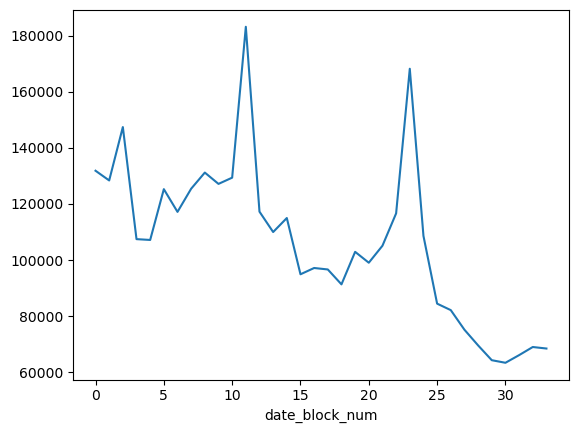

In [154]:
# Распределение продаж по месяцам
sales.groupby('date_block_num')['target'].sum().plot()

In [156]:
sales[sales['target'] > 100].value_counts() # Показать подозрительные строки

Series([], Name: count, dtype: int64)

<Axes: title={'center': 'Продажи по месяцам (без аномалий)'}, xlabel='date_block_num'>

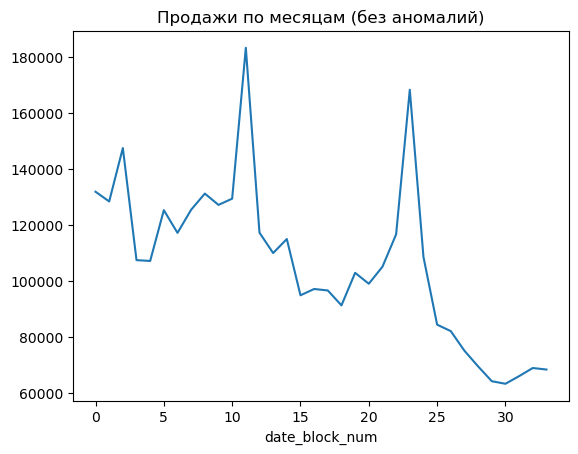

In [158]:
# 1. Удаление аномалий
sales = sales[(sales['target'] > 0) & (sales['target'] <= 100)]

# 2. Агрегация по магазинам и товарам
monthly_sales = sales.groupby(['shop_id', 'item_id', 'date_block_num'])['target'].sum().reset_index()

# 3. Визуализация продаж после очистки
monthly_sales.groupby('date_block_num')['target'].sum().plot(title='Продажи по месяцам (без аномалий)')

In [159]:
monthly_sales = sales.groupby(['shop_id', 'item_id', 'date_block_num'])['target'].sum().reset_index()

In [162]:
sales['target'].value_counts()

target
1.0     2629372
2.0      194201
3.0       47350
4.0       19685
5.0       10474
         ...   
85.0          2
76.0          2
96.0          1
93.0          1
95.0          1
Name: count, Length: 99, dtype: int64

In [164]:
sales['item_id'].nunique()

21804

In [67]:
monthly_sales

,shop_id,item_id,date_block_num,target
0,0,30,1,31.0
1,0,31,1,11.0
2,0,32,0,6.0
3,0,32,1,10.0
4,0,33,0,3.0
...,...,...,...,...
1608214,59,22164,27,2.0
1608215,59,22164,30,1.0
1608216,59,22167,9,1.0
1608217,59,22167,11,2.0


In [68]:
index_cols = ['shop_id', 'item_id', 'date_block_num']

# For every month we create a grid from all shops/items combinations from that month
grid = []
for block_num in sales['date_block_num'].unique():
    cur_shops = sales[sales['date_block_num']==block_num]['shop_id'].unique()
    cur_items = sales[sales['date_block_num']==block_num]['item_id'].unique()
    grid.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))

#turn the grid into pandas dataframe
grid = pd.DataFrame(np.vstack(grid), columns = index_cols,dtype=np.int32)

#get aggregated values for (shop_id, item_id, month)
gb = sales.groupby(index_cols,as_index=False).agg({'target':'sum'})

#join aggregated data to the grid
all_data = pd.merge(grid,gb,how='left',on=index_cols).fillna(0)

#sort the data
all_data.sort_values(['date_block_num','shop_id','item_id'],inplace=True)

### Mean encodings без регуляризации

После проделанной технической работы, мы готовы посчитать счетчики для переменной `item_id`.

Ниже приведены две реализации подсчета счетчиков без регуляризации. Можно использовать данный код в качестве стартовой точки для реализации различных техник регуляризации.

#### Способ 1

In [72]:
# Calculate a mapping: {item_id: target_mean}
item_id_target_mean = all_data.groupby('item_id').target.mean()

# In our non-regularized case we just *map* the computed means to the `item_id`'s
all_data['item_target_enc'] = all_data['item_id'].map(item_id_target_mean)

# Fill NaNs
all_data['item_target_enc'].fillna(0.3343, inplace=True)

# Print correlation
encoded_feature = all_data['item_target_enc'].values
print(np.corrcoef(all_data['target'].values, encoded_feature)[0][1])

0.5311426676269198


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15092\2599960635.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data['item_target_enc'].fillna(0.3343, inplace=True)


#### Способ 2

In [74]:
'''
   Differently to `.target.mean()` function `transform`
   will return a dataframe with an index like in `all_data`.
   Basically this single line of code is equivalent to the first two lines from of Method 1.
'''

all_data['item_target_enc'] = all_data.groupby('item_id')['target'].transform('mean')

# Fill NaNs
all_data['item_target_enc'].fillna(0.3343, inplace=True)

# Print correlation
encoded_feature = all_data['item_target_enc'].values
print(np.corrcoef(all_data['target'].values, encoded_feature)[0][1])

0.5311426676269198


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15092\1544652128.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data['item_target_enc'].fillna(0.3343, inplace=True)


###  KFold схема (**1.25 балла**)

Необходимо реализовать Kfold схему с пятью фолдами. Используйте KFold(5) из sklearn.model_selection.

1. Разбейте данные на 5 фолдов при помощи `sklearn.model_selection.KFold` с параметром `shuffle=False`.
2. Проитерируйтесь по фолдам: используйте 4 обучающих фолда для подсчета средних значений таргета по `item_id` и заполните этими значениями валидационный фолд на каждой итерации.

Обратите внимание на **Способ 1** из примера. В частности, изучите, как работают функции map и pd.Series.map. Они довольно полезны во многих ситуациях.

In [77]:
# YOUR CODE GOES HERE

# You will need to compute correlation like that
corr = np.corrcoef(all_data['target'].values, encoded_feature)[0][1]
print(corr)

0.5311426676269198


In [78]:
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

# Создаем копию данных, чтобы не изменять исходные
all_data_encoded = all_data.copy()

# Инициализируем новый признак
all_data_encoded['item_target_enc'] = np.nan

# Разбиваем данные на 5 фолдов без перемешивания
kf = KFold(n_splits=5, shuffle=False)

for train_idx, val_idx in kf.split(all_data_encoded):
    # Вычисляем средние значения target по item_id на обучающих фолдах
    train_data = all_data_encoded.iloc[train_idx]
    item_id_target_mean = train_data.groupby('item_id')['target'].mean()
    
    # Заполняем валидационный фолд вычисленными средними
    val_data = all_data_encoded.iloc[val_idx]
    all_data_encoded.loc[val_idx, 'item_target_enc'] = val_data['item_id'].map(item_id_target_mean)

# Заполняем пропущенные значения (если item_id не встречался в обучающих фолдах)
global_mean = all_data['target'].mean()
all_data_encoded['item_target_enc'] = all_data_encoded['item_target_enc'].fillna(global_mean)


# Вычисляем корреляцию
encoded_feature = all_data_encoded['item_target_enc'].values
corr = np.corrcoef(all_data['target'].values, encoded_feature)[0][1]
print(f'Корреляция между target и item_target_enc: {corr:.4f}')

Корреляция между target и item_target_enc: 0.4512


Ожидаемый ответ 0.4165

In [80]:
# Пример на разборе




### Leave-one-out схема (**1.25 балла**)

Необходимо реализовать leave-one-out схему. Это когда у вас количество фолдов из прошлого пункта равно количеству объектов. Учтите, если вы запустите код из первого задания, задав количество фолдов такое же как размер выборки, то вы, вероятно, получите правильный ответ, но ждать будете очень-очень долго.

Для более быстрой реализации подсчета среднего таргета на всех объектах, кроме одного, вы можете:

1. Вычислить суммарный таргет по всем объектам.
2. Вычесть таргет конкретного объекта и разделить результат на `n_objects - 1`.

Заметим, что пункт `1.` следует сделать для всех объектов. Также заметим, что пункт `2.` может быть реализован без циклов `for`.

Здесь может оказаться полезной функция .transform из **Способа 2** из примера.

In [144]:
# Разбор уже на лекции на последнем занятии


total_sum = all_data.groupby('item_id')['target'].transform('sum')
total_count = all_data.groupby('item_id')['target'].transform('count')
all_data['item_target_enc'] = np. nan
all_data['item_target_enc'] = (total_sum)
global_mean = all_data['target'].mean()
all_data['item_target_enc'] = all_data['item_target_enc']. fillna(global_mean)

corr = np.corrcoef(all_data['target']. values, all_data['item_target_enc']) [0] [1]
print(corr)



0.5177764324647433


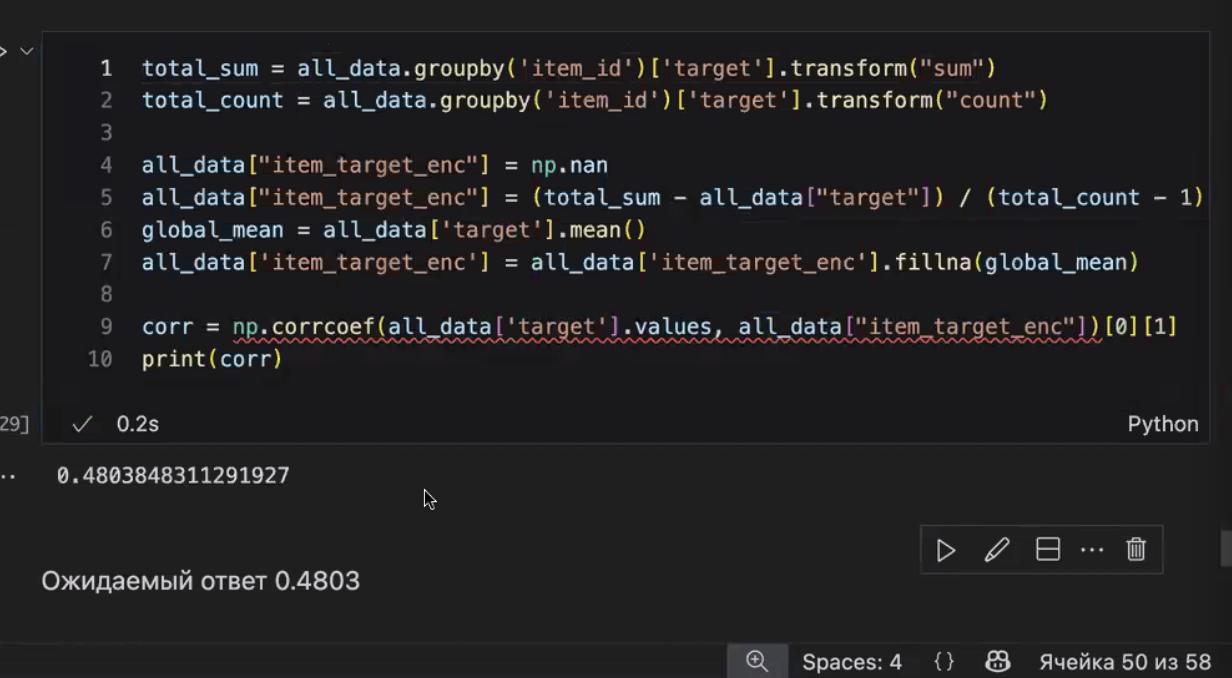

Ожидаемый ответ 0.4803

### Smoothing (**1.25 балла**)

Необходимо реализовать smoothing с $\alpha = 100$. Используйте формулу:

$\frac{mean(target) \cdot nrows + globalmean \cdot \alpha }{nrows + \alpha}$,

где $globalmean=0.3343$. `nrows` - это количество объектов, принадлежащих конктертной категории, а не количество строк в датасете.

In [86]:
# YOUR CODE GOES HERE

corr = np.corrcoef(all_data['target'].values, encoded_feature)[0][1]
print(corr)

0.45115728840620467


In [87]:
import pandas as pd
import numpy as np

# Копируем данные
all_data_encoded = all_data.copy()

# Параметры smoothing
alpha = 100
global_mean = 0.3343  # задано по условию

# Вычисляем количество наблюдений (nrows) для каждой группы (item_id)
group_count = all_data_encoded.groupby('item_id')['target'].transform('count')

# Вычисляем среднее значение target для каждой группы
group_mean = all_data_encoded.groupby('item_id')['target'].transform('mean')

# Применяем формулу сглаживания:
all_data_encoded['item_target_smooth'] = (group_mean * group_count + global_mean * alpha) / (group_count + alpha)

corr = np.corrcoef(all_data['target'].values, encoded_feature)[0][1]
print(f'{corr:.4f}')


0.4512


Ожидаемый ответ 0.4818

In [ ]:
# Разбор задания на последннем занятии

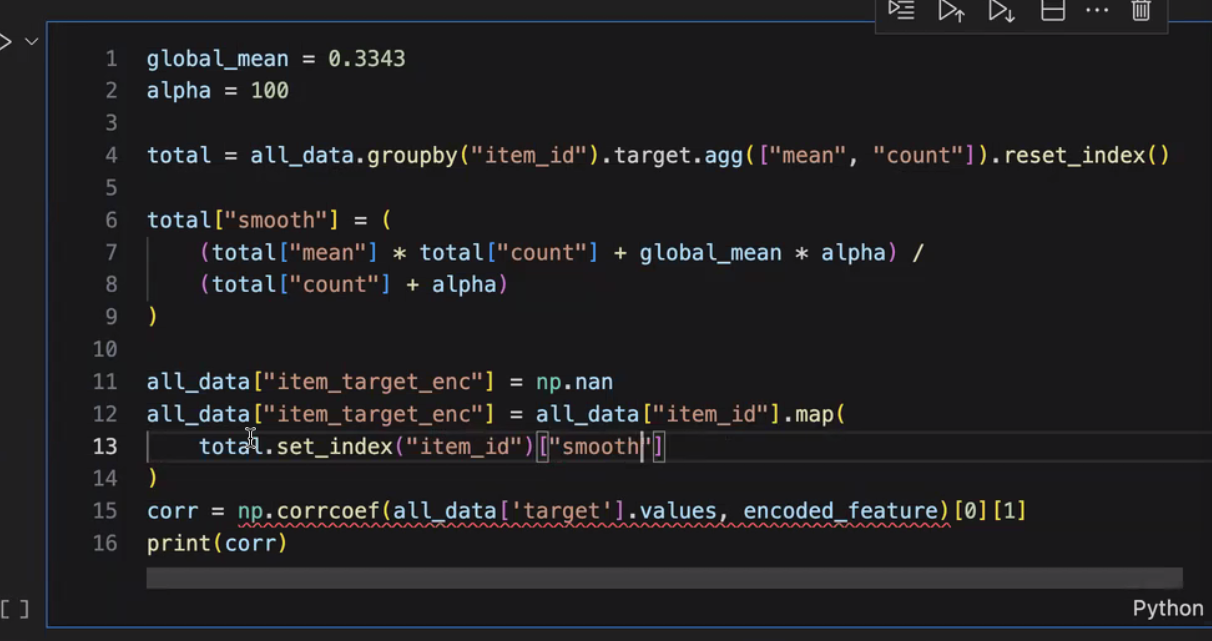

### Expanding mean схема (**1.25 балла**)

Необходимо реализовать *expanding mean* схему. Ее суть заключается в том, чтобы пройти по отсортированному в определенном порядке датасету (датасет сортируется в самом начале задания) и для подсчета счетчика для строки $m$ использовать строки от $0$ до $m-1$. Вам будет необходимо воспользоваться pandas функциями [`cumsum`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.cumsum.html) и [`cumcount`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.GroupBy.cumcount.html).

In [91]:
import pandas as pd
import numpy as np

# Предполагаем, что DataFrame all_data уже отсортирован по нужному критерию 
all_data_encoded = all_data.copy()

# Группируем данные по 'item_id'
group = all_data_encoded.groupby('item_id')

# Вычисляем кумулятивный номер строки в каждой группе (начинается с 0)
all_data_encoded['cumcount'] = group.cumcount()

# Вычисляем кумулятивную сумму target для каждой группы.
# Вычтем текущее значение, чтобы не учитывать его в расчёте.
all_data_encoded['cumsum'] = group['target'].cumsum() - all_data_encoded['target']

# Вычисляем expanding mean как отношение (кумулятивная сумма до текущей строки)/(количество предыдущих наблюдений)
all_data_encoded['item_target_expanding'] = all_data_encoded['cumsum'] / all_data_encoded['cumcount']

# Обрабатываем случаи первой строки в группе (деление на 0) – заменяем на глобальное среднее.
global_mean = all_data_encoded['target'].mean()
all_data_encoded['item_target_expanding'] = all_data_encoded['item_target_expanding'].fillna(global_mean)

# Вычисляем корреляцию нового признака с целевой переменной target
encoded_feature = all_data_encoded['item_target_expanding'].values

corr = np.corrcoef(all_data['target'].values, encoded_feature)[0][1]
print(f'{corr:.4f}')

0.5525


Ожидаемый ответ 0.5025

In [ ]:
# Рахбор на занятии последнем
all_data.sort_values(['date_block_num','shop_id','item_id'],inplace=True)

cumsum_total = all_data.group_by

In [152]:
all_data.sort_values(['date_block_num','shop_id','item_id'],inplace=True)
cumsum_total = all_data.groupby('item_id').target.cumsum()
cumcount_total = all_data.groupby('item_id').cumcount()
cumsum_usable = cumsum_total - all_data['target']
all_data['item_target_enc'] = np.nan
all_data['item_target_enc'] = cumsum_usable / cumcount_total
global_mean = all_data['target']. mean()
all_data['item_target_enc'] = all_data['item_target_enc'].fillna(global_mean)
corr = np. corrcoef(all_data['target']. values, all_data['item_target_enc'])[0] [1]
print(corr)


0.5525218421214709


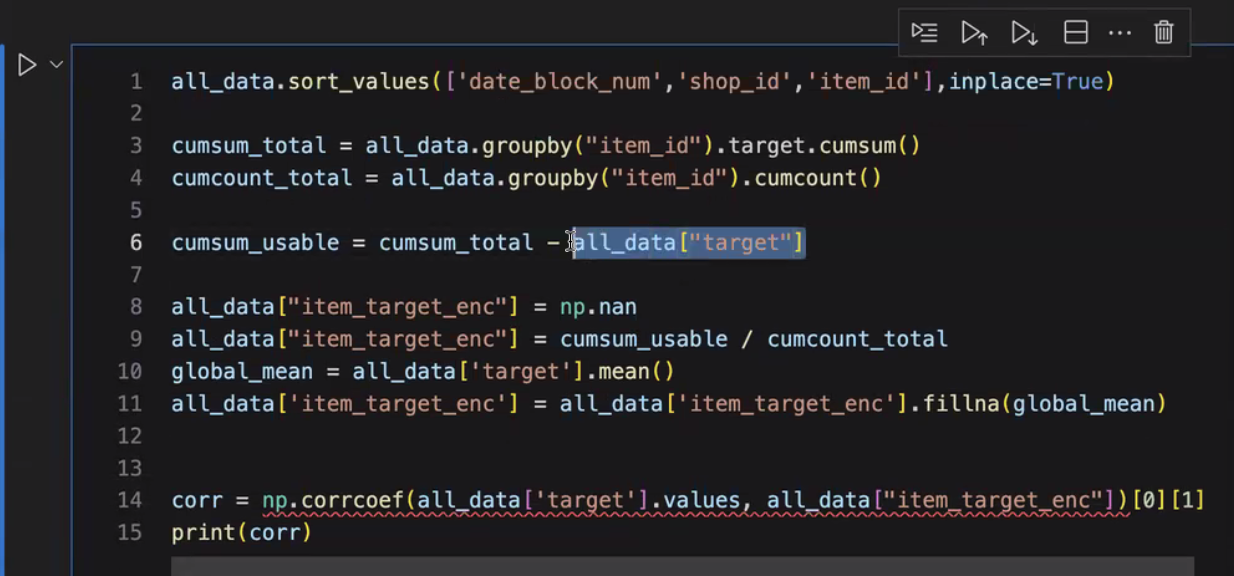